1. (15 points) Write a Python script to concatenate two images into a single output. If the
images have different heights, shrink the image with the greater height so that it matches the
smaller height. For example, if the first image has h1, w1 = 512, 400 and the second image
has h2, w2 = 640, 480 then the second image should be resized to be h2, w2 = 512, 384, and
the concatenated image should have height 512 and width 480 + 384 = 864. Please output
the dimensions of the final image and display it.

In [9]:
import numpy as np
import cv2


user_input = input("Enter 2 image file names separated by a space, images must already be saved in project directory: ")
image_input = user_input.split()
np_image_array = np.array(image_input, dtype=str)

image1 = np_image_array[0]
image2 = np_image_array[1]

im1 = cv2.imread(image1)
im2 = cv2.imread(image2)

if im1.shape == im2.shape:
    concat_img = np.concatenate((im1, im2), axis=1)
elif (im1.shape[0] > im2.shape[0]):
    im1_sm = cv2.resize(im1, (im1.shape[1], im2.shape[0]))
    concat_img = np.concatenate((im1_sm, im2), axis=1)
elif (im2.shape[0] > im1.shape[0]):
    im2_sm = cv2.resize(im2, (im2.shape[1], im1.shape[0]))
    concat_img = np.concatenate((im1, im2_sm), axis=1)
    
max_width_for_display = 1500  # Adjust this value as needed
if concat_img.shape[1] > max_width_for_display:
    scale_factor = max_width_for_display / concat_img.shape[1]
    concat_img = cv2.resize(concat_img, (int(concat_img.shape[1] * scale_factor), int(concat_img.shape[0] * scale_factor)))
    
final_height, final_width, _ = concat_img.shape
print(f"Final image dimensions: Height = {final_height}, Width = {final_width}")
cv2.imshow('Concatenated Image', concat_img)
cv2.waitKey(0)
cv2.destroyAllWindows()



Enter 2 image file names separated by a space, images must already be saved in project directory: Namib_Desert_(Satellite_picture).jpg cat-dog-1.jpeg
Final image dimensions: Height = 440, Width = 1348


2. (15 points) Write a Python function that computes and outputs the mean and standard
deviation of each of the red, green and blue values in a color image. The output should be
just three lines, for example,
red: 129.1 12.6
green: 197.2 40.3
blue: 204.4 23.5
1
Please note that the output should include only one decimal place of precision.

In [8]:
import numpy as np
import cv2

def calc_mean_std(image_name):
    
    im = cv2.imread(image_name)
    
    # Calculate the mean for each color channel (BGR)
    b_mean = np.mean(im[:, :, 0])
    g_mean = np.mean(im[:, :, 1])
    r_mean = np.mean(im[:, :, 2])

    # Calculate the standard deviation for each color channel (BGR)
    b_stddev = np.std(im[:, :, 0])
    g_stddev = np.std(im[:, :, 1])
    r_stddev = np.std(im[:, :, 2])

    # Print the results with one decimal place of precision
    print(f"red: {r_mean:.1f} {r_stddev:.1f}")
    print(f"green: {g_mean:.1f} {g_stddev:.1f}")
    print(f"blue: {b_mean:.1f} {b_stddev:.1f}")
    

im_fns = [
    'Namib_Desert_(Satellite_picture).jpg',
    'cat-dog-1.jpeg',
    'polar-bear-ice.jpg',
    'Ghanean-Rainforest-scaled.jpg',
    'two_and_two.jpeg',
]
for fn in im_fns:
    calc_mean_std(fn)
    print()

red: 168.4 37.7
green: 118.1 36.9
blue: 92.0 33.6

red: 136.3 64.6
green: 127.6 69.8
blue: 79.3 79.1

red: 130.0 49.6
green: 148.7 44.8
blue: 166.4 44.8

red: 114.3 74.3
green: 123.3 71.1
blue: 81.1 82.1

red: 220.4 62.9
green: 214.4 70.6
blue: 210.7 75.8



3. (25 points) The retrieval task is a variation on the classification task where for each query
q a database is searched and possible matches that could be from the same category as q are
returned in order of likelihood. Referring to these matches as d1, d2, d3, . . ., we say that the
performance on the query has rank k if dk is the first match from the same category as q, in
other words if d1, . . . , dk−1 are each from a different category as q.
Suppose we run a series of queries from different categories and we would like to summarize
the results. For each category we’d like to know the average of k. We’d also like to know the
average across all categories. This could be either the average of the averages, which is called
the macro average, or it could be the overall average across all queries, which is called the
micro average. The macro and micro averages are only guaranteed to be the same if we have
the same number of queries for each category.
Suppose we represent the query results in a two-dimensional array Q, where row i of Q
corresponds to the i-th category and entry j of row i is the value of k for the j-th query for
category i. Note that if Qi,j = −1 then the j-th query should be ignored.
Output the average k for each category and then output the macro average and the micro
average. All values should be acccurate to 2 decimal places. The only for loops should be at
the end to output the results.
Here’s a simple example to illustrate with two categories


In [12]:
import numpy as np


list = [[2, -1, 5, 1, 4, 4], [4, 8, -1, -1, -1, 11]]

def calc_values(list):
    
    np_list = np.array(list)

    valid_indexes = np_list != -1

    sums = (np_list * valid_indexes).sum(axis=1) #zeroes out invalid values by multiplying by boolean vals
    counts = valid_indexes.sum(axis=1) #counts number of valid values

    with np.errstate(divide = 'ignore', invalid = 'ignore'):
        cat_avgs = np.where(counts != 0, sums / counts, 0) #calculates each category average

    macro_avg = np.mean(cat_avgs)
    micro_avg = np_list[valid_indexes].sum() / valid_indexes.sum()

    for i, avg in enumerate(cat_avgs): #outputs final values
        print(f"Average k for category {i + 1}: {avg:.2f}")
    print(f"Macro Average: {macro_avg:.2f}")
    print(f"Micro Average: {micro_avg:.2f}")
    
fns = [
    'q3_ex1.txt',
    'q3_ex2.txt'
]

for fn in fns:
    print(f'\n{fn}')
    arr = np.loadtxt(fn, delimiter=",", dtype=int)
    calc_values(arr)


q3_ex1.txt
Average k for category 1: 3.20
Average k for category 2: 7.67
Macro Average: 5.43
Micro Average: 4.88

q3_ex2.txt
Average k for category 1: 8.38
Average k for category 2: 3.78
Average k for category 3: 9.20
Average k for category 4: 2.82
Macro Average: 6.04
Micro Average: 5.39


4. (20 points) In class, we created a binary image from a grayscale image using a fixed threshold
of 128. In this problem I’d like you to create an image that has four values: 0, 85, 170 and
255, and there should be approximately the same number of pixels with each value. To do
this, pixels assigned the value 0 should be the darkest 25% of the pixels, in other words, the
pixels whose intensities are in the lowest quartile of the image intensities. Pixels assigned the
value 85 should have intensities in the 2nd quartile. Pixels assigned the value 170 should be
from the 3rd quartile. Finally, pixels assigned the value 255 should be in the 4th quartile of
intensity — i.e. the brightest 25% of the pixels.
Output the three breaks between the quartiles. These breaks are the smallest intensities
mapped to the second, third and fourth quartile. Then output the final image. As a simple
example, the “image”



Namib_Desert_(Satellite_picture).jpg
Quartile breaks: [112 131 152]


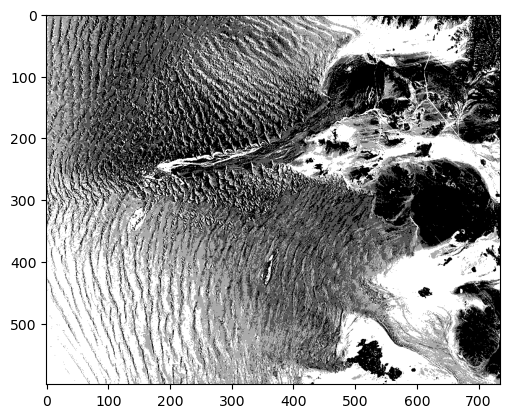


cat-dog-1.jpeg
Quartile breaks: [58 126 167]


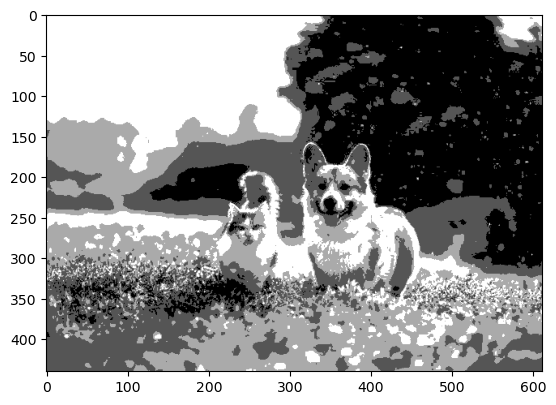


polar-bear-ice.jpg
Quartile breaks: [107 161 181]


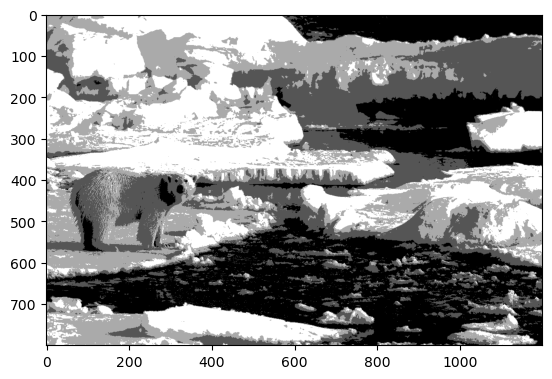


Ghanean-Rainforest-scaled.jpg
Quartile breaks: [56 105 167]


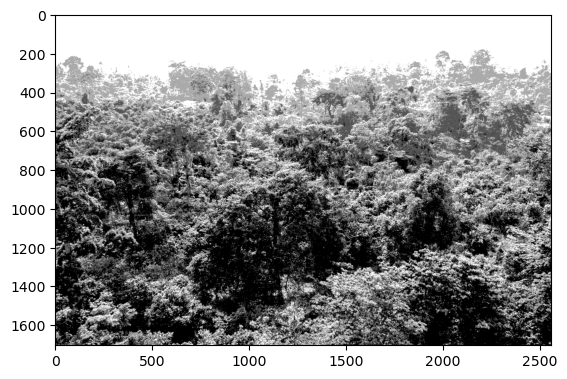


two_and_two.jpeg
Quartile breaks: [203 255 255]


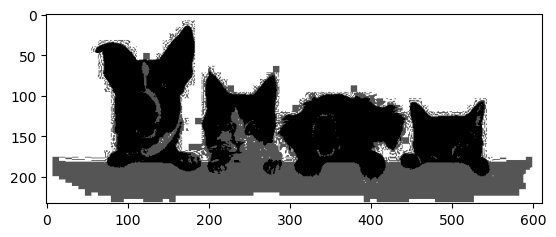

In [16]:
'''
Question 4:

Alert: in order to properly show a grayscale image using Matplotlib
you must call plt.gray() before you callgg plt.imshow and plt.show
'''
import numpy as np
import cv2
from matplotlib import pyplot as plt

#### Solution start

def prob4_multithreshold(fn):
    img = cv2.imread(fn, cv2.IMREAD_GRAYSCALE)
    
    flattened = img.flatten()
    
    #splits image intensity values into quartiles from darkest to brightest
    sorted_flat = np.sort(flattened)
    q1 = sorted_flat[int(len(sorted_flat) * 0.25)]
    q2 = sorted_flat[int(len(sorted_flat) * 0.5)]
    q3 = sorted_flat[int(len(sorted_flat) * 0.75)]
    print(f"Quartile breaks: [{q1} {q2} {q3}]")
    
    #categorizes pixels from original image to 4 brightness levels into a new image
    output_image = np.zeros_like(img)
    output_image[(img >= q1) & (img < q2)] = 85
    output_image[(img >= q2) & (img < q3)] = 170
    output_image[img >= q3] = 255
    
    plt.gray()
    plt.imshow(output_image)
    plt.show()

#### Solution end

im_fns = [
    'Namib_Desert_(Satellite_picture).jpg',
    'cat-dog-1.jpeg',
    'polar-bear-ice.jpg',
    'Ghanean-Rainforest-scaled.jpg',
    'two_and_two.jpeg',
]

for fn in im_fns:
    print(f'\n{fn}')
    prob4_multithreshold(fn)